# Edge Detection
*Luis Eduardo Robles Jiménez || 0224969*

*Sara Carolina Gómez Delgado || 0226594*

In [388]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Part 1

### Read image

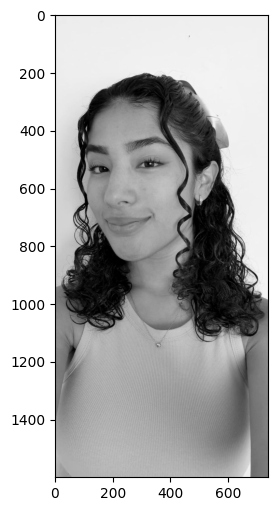

In [389]:
# img = cv2.imread("../../images/stitch.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("../../images/mickey.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("../../images/me.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.show()

### Canny Edge Detection (*OpenCV*)

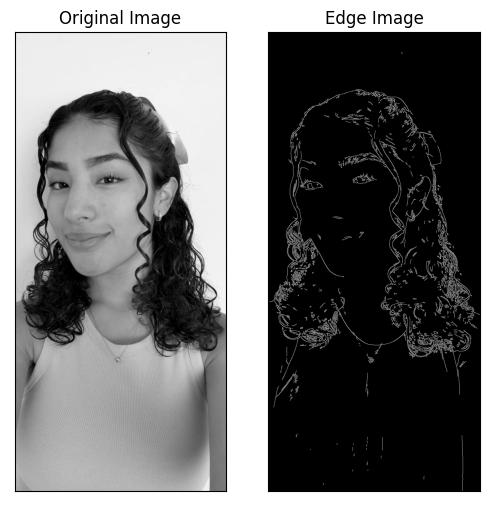

In [390]:
edges = cv2.Canny(img.copy(),100,200)

plt.figure(figsize=(6,6))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Ours

#### *Clean image*

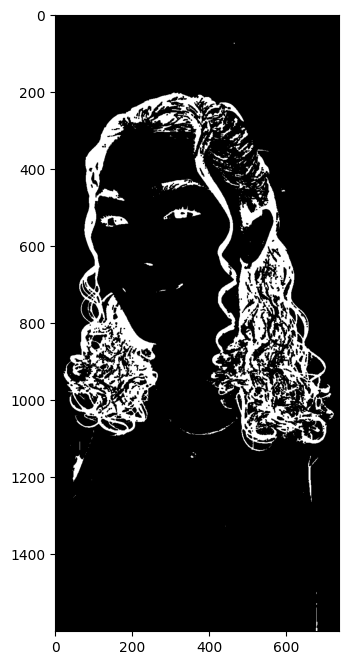

In [391]:
gray = img.copy()

a = 10

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=a, sigmaY=a)
divide = cv2.divide(gray, blur, scale=50)
imgNormalize1 = cv2.normalize(divide,None,0,255,cv2.NORM_MINMAX)
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# show result
plt.figure(figsize=(8,8))
plt.imshow(morph, cmap = "gray")


#### *High-pass filter*

In [392]:
img_float32 = np.float32(morph)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = morph.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
r = 120
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_One = cv2.idft(f_ishift)
img_One = cv2.magnitude(img_One[:,:,0],img_One[:,:,1])


#### *Show results*

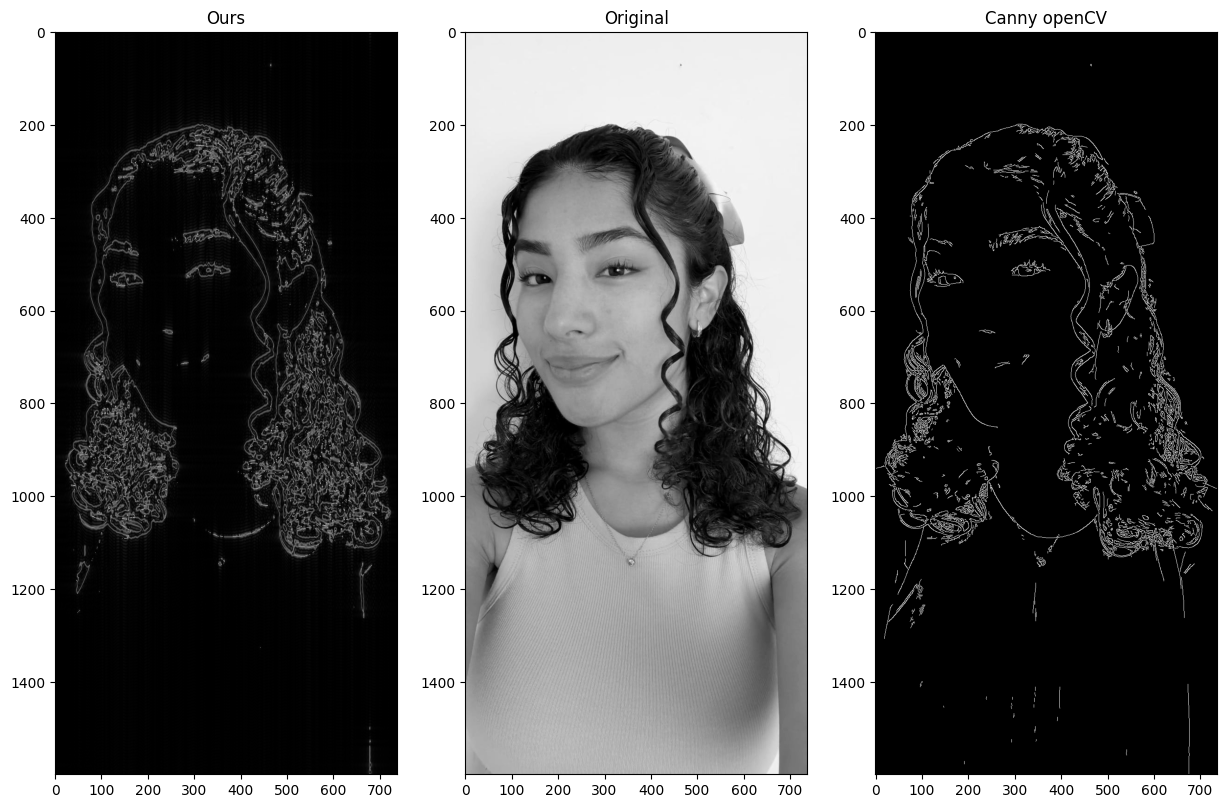

In [393]:

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_One,cmap = 'gray');
plt.title('Ours');
plt.subplot(1,3,2);
plt.imshow(img,cmap = 'gray');
plt.title('Original');
plt.subplot(1,3,3);
plt.imshow(edges,cmap = 'gray');
plt.title('Canny openCV');

#### *Save images*

In [394]:
cv2.imwrite("original.jpg", img) 
plt.imsave("ours.jpg",img_One, cmap = 'gray')
cv2.imwrite("canny.jpg", edges)

True

### __What do you observe? What modifications would you make to your algorithm? Describe your process in detail.__
Process:

1. Reduce the original image noise.
2. Apply high-pass filter to avoid low frecuencies and just keep the strongest ones.

*__Note:__ We tried applying an "open" after the high-pass filter, but this just worked for images that had less details.*


We can observe that our method looks for the high frequencies pixels. This may explain why it detects better the hair in the example image than the mouth.

Some modifications we would make to our algorithm is to sharpen a little more the borders detected and make them whiter in order to make them more visible.


## Part 2